# Latar Belakang
Perusahaan Transjakarta yang bergerak dibidang transportasi ingin melihat hasil analisa dari data yang masuk pada bulan April 2023. Data mencakup detail seperti ID transaksi, informasi kartu pembayaran, rute perjalanan (corridorID, corridorName), waktu tap-in dan tap-out, serta jumlah pembayaran (payAmount).

## Pernyataan Masalah
Perusahaan ingin mengetahui hal-hal berikut:
- Koridor mana yang memiliki jumlah transaksi terbanyak?
- Kapan waktu puncak penggunaan Transjakarta (jam sibuk)?
- Berapa durasi perjalanan rata-rata?
- Bagaimana distribusi payAmount (gratis vs. berbayar)?
- Apakah ada pola berdasarkan jenis kelamin atau kelompok usia penumpang?

Informasi ini akan membantu perusahaan untuk membersihkan data, mengidentifikasi pola perjalanan, dan meningkatkan efisiensi operasional dan pengalaman penumpang

Sebagai seorang *data analysis* kita akan berusaha menjawab pertanyaan-pertanyaan di atas

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses disini https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")



Dataset ini berisi informasi terkait detail perjalanan penumpang:
- transID: Unique transaction id for every transaction
- payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
- payCardBank: Customers card bank issuer name
- payCardName: Customers name that is embedded in the card.
- payCardSex: Customers sex that is embedded in the card
- payCardBirthDate: Customers birth year
- corridorID: Corridor ID / Route ID as key for route grouping.
- corridorName: Corridor Name / Route Name contains Start and Finish for each route.
- direction: 0 for Go, 1 for Back. Direction of the route.
- tapInStops: Tap In (entrance) Stops ID for identifying stops name
- tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
- tapInStopsLat: Latitude of Tap In Stops
- tapInStopsLon: Longitude of Tap In Stops
- stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapInTime: Time of tap in. Date and time
- tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
- tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
- tapOutStopsLat: Latitude of Tap Out Stops
- tapOutStopsLon: Longitude of Tap Out Stops
- stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapOutTime: Time of tap out. Date and time
- payAmount: The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.csv.

In [2]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [3]:
print(f'Jumlah baris dan kolom di dataset adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

- Data set TransJakarta memilikin 22 kolom dan 37,900 baris
- Kolom seperti `corridorID`, `corridorName`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki missing values.

# MISSING VALUES

In [6]:
#Cek presentasi Missing Values disetiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Dari cuplikan data, terlihat beberapa kolom seperti `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki data yang hilang. Kita akan menanganinya berdasarkan konteks:
- Jika `tapOutTime` hilang, transaksi mungkin tidak lengkap (penumpang tidak tap out).
- Jika `corridorID` atau `corridorName` hilang, transaksi tidak dapat dianalisis untuk rute.
- Untuk kolom lain tidak perlu kita tangani karena tidak dibutuhkan dalam analisis kita

In [18]:
# Menghapus baris dengan corridorID atau tapInStopsName kosong
df.dropna(subset=['corridorID', 'tapInStopsName'], inplace=True)

Kita mengahpus baris hilang di `corridorID` atau `corridorName` karena tidak dapat kita analisis

In [19]:
# Mengisi tapOutTime dengan nilai sementara (misalnya, NaT)
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')

Missing value `tapOutTime`  kita ganti dengan nilai sementara karena masih kita butuhkan untuk analisis tap-in saja, tetapi durasi perjalanan dihitung hanya untuk transaksi yang lengkap.

In [20]:
# Mengisi missing value di payAmount dengan 0
df['payAmount'].fillna(0, inplace=True)

Missing value di `payAmount` kita ganti 0 dan kita asumsikan sebagai perjalanan gratis

Lalu mari kita periksa apakah ada data duplikat pada dataset ini? Kita akan periksa berdasarkan `transID`.

In [22]:
print(f"Jumlah duplikat: {df.duplicated(subset='transID').sum()}")
df.drop_duplicates(subset='transID', inplace=True)

Jumlah duplikat: 0


# Anomali
Selanjutnya mari kita periksa anomali dari kolom yang kita butuhkan untuk analisa seperti:
- Anomali Waktu: `tapOutTime` sebelum `tapInTime` sudah pasti tidak logis.
- Anomali Durasi: Durasi perjalanan negatif atau terlalu lama (misalnya, >3 jam).
- Anomali Usia: `payCardBirthDate` yang menghasilkan usia tidak wajar (misalnya, <5 tahun atau >100 tahun).



In [23]:
# Memeriksa anomali waktu
df['travel_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60
invalid_times = df[df['travel_duration'] < 0]
print(f"Jumlah anomali waktu: {len(invalid_times)}")
df = df[df['travel_duration'] >= 0]

Jumlah anomali waktu: 0


In [24]:
# Menghapus durasi perjalanan yang terlalu lama (>3 jam)
df = df[df['travel_duration'].isna() | (df['travel_duration'] <= 180)]

In [25]:
# Menghitung usia berdasarkan payCardBirthDate
df['age'] = 2023 - df['payCardBirthDate']

# Memeriksa usia tidak wajar
invalid_age = df[(df['age'] < 5) | (df['age'] > 100)]
print(f"Jumlah usia tidak wajar: {len(invalid_age)}")
df = df[(df['age'] >= 5) & (df['age'] <= 100)]

Jumlah usia tidak wajar: 0


Setelah kita melakukan pembersihan, kita bisa memastikan data valid untuk kita analisis. Selanjutnya mari kita analisa dari konteks pertanyaan di awal.

# ANALISA

## Koridor Paling Sibuk

In [27]:
# Menghitung jumlah transaksi per koridor
corridor_counts = df['corridorName'].value_counts().head(10)
corridor_counts

corridorName
Cibubur - Balai Kota                           375
Ciputat - CSW                                  371
Harmoni - Jakarta International Stadium        328
Pulo Gadung - Monas                            325
Kampung Rambutan - Pondok Gede                 324
Kalideres - Bundaran HI via Veteran            318
Rusun Pondok Bambu - Walikota Jakarta Timur    317
Kebayoran Lama - Tanah Abang                   315
Rusun Rawa Bebek - Kodamar                     301
BKN - Blok M                                   291
Name: count, dtype: int64

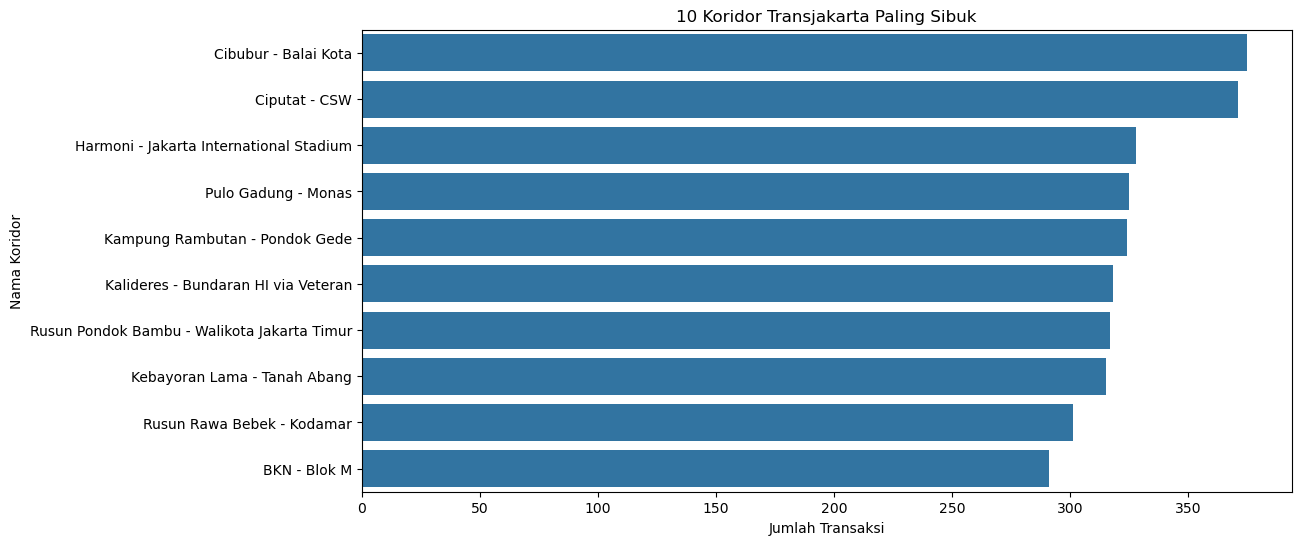

In [29]:
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=corridor_counts.values, y=corridor_counts.index)
plt.title('10 Koridor Transjakarta Paling Sibuk')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Nama Koridor')
plt.show()

Dengan melihat Bar plot diatas, menunjukkan koridor dengan transaksi terbanyak adalah `Cibubur - Balai Kota` disusul dengan `Ciputat - CSW`

## Distribusi Jam Tap-In

In [31]:
# Ekstrak jam dari tapInTime
df['tap_in_hour'] = df['tapInTime'].dt.hour
df['tap_in_hour']

0        5 
1        5 
2        5 
3        5 
4        6 
        .. 
37895    18
37896    21
37897    10
37898    19
37899    21
Name: tap_in_hour, Length: 35351, dtype: int32

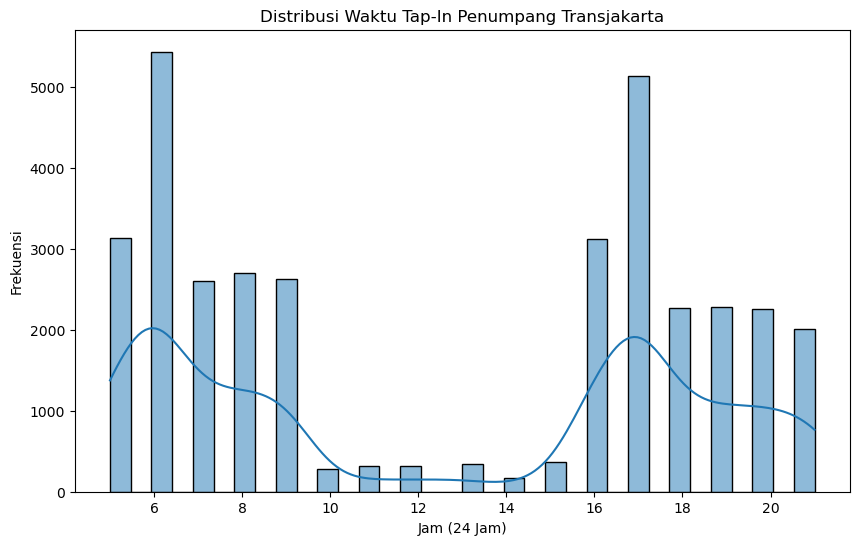

In [53]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(df['tap_in_hour'], bins=34, kde=True)
plt.title('Distribusi Waktu Tap-In Penumpang Transjakarta')
plt.xlabel('Jam (24 Jam)')
plt.ylabel('Frekuensi')
plt.show()

Dari Histogram di atas kita bisa mengidentifikasi **jam sibuk**, seperti pagi (06:00–08:00) atau sore (17:00–19:00).

## Durasi Perjalanan

In [54]:
# Statistik durasi perjalanan
print(df['travel_duration'].describe())

count    35351.000000
mean     72.169082   
std      28.059825   
min      15.000000   
25%      51.150000   
50%      71.933333   
75%      95.766667   
max      179.050000  
Name: travel_duration, dtype: float64


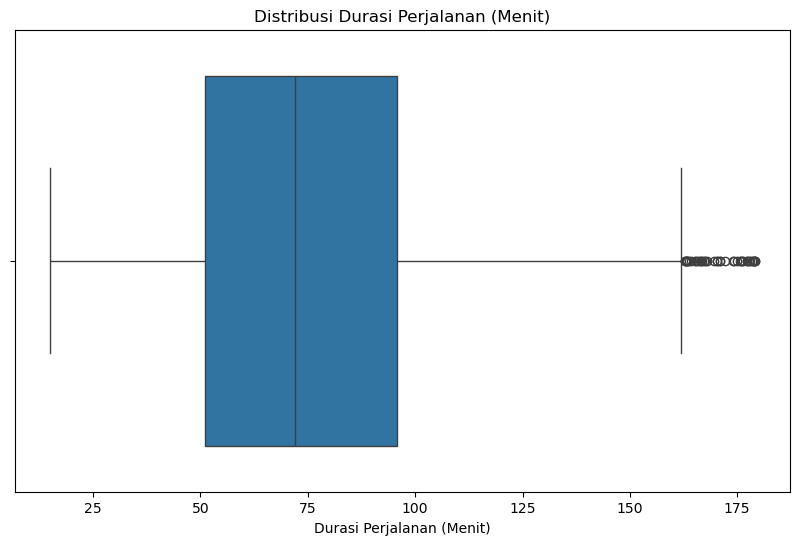

In [55]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['travel_duration'])
plt.title('Distribusi Durasi Perjalanan (Menit)')
plt.xlabel('Durasi Perjalanan (Menit)')
plt.show()

Boxplot diatas menunjukkan rata-rata durasi perjalanan dan mendeteksi adanya outlier

## Distribusi PayAmount

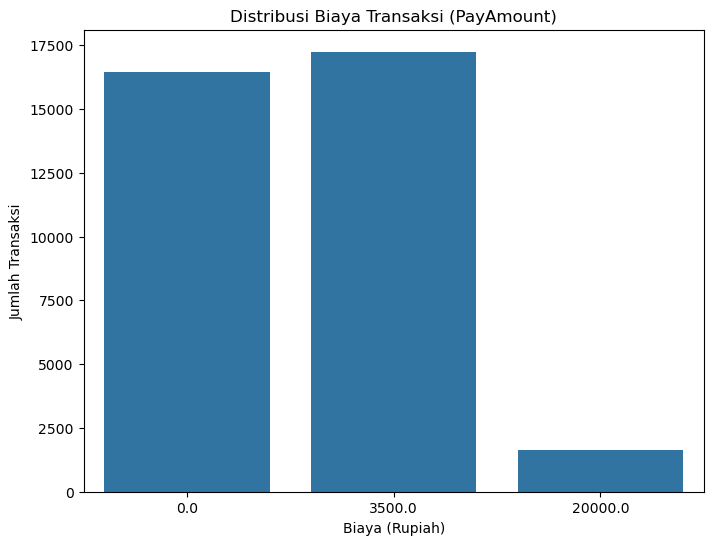

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='payAmount', data=df)
plt.title('Distribusi Biaya Transaksi (PayAmount)')
plt.xlabel('Biaya (Rupiah)')
plt.ylabel('Jumlah Transaksi')
plt.show()

Dari grafik data diatas, payAmount memiliki nilai seperti 0 (kita asumsikan gratis), 3500, dan 20000. Plot ini menunjukkan proporsi transaksi gratis vs berbayar

## Distribusi Demografi

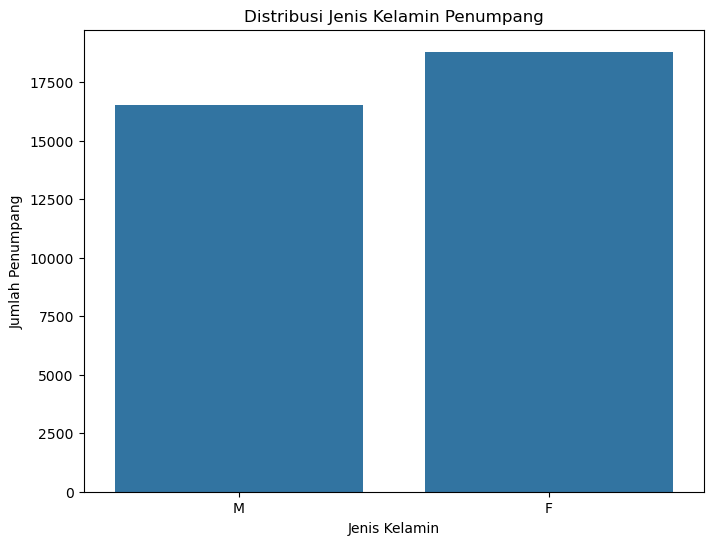

In [57]:
# Distribusi jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='payCardSex', data=df)
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

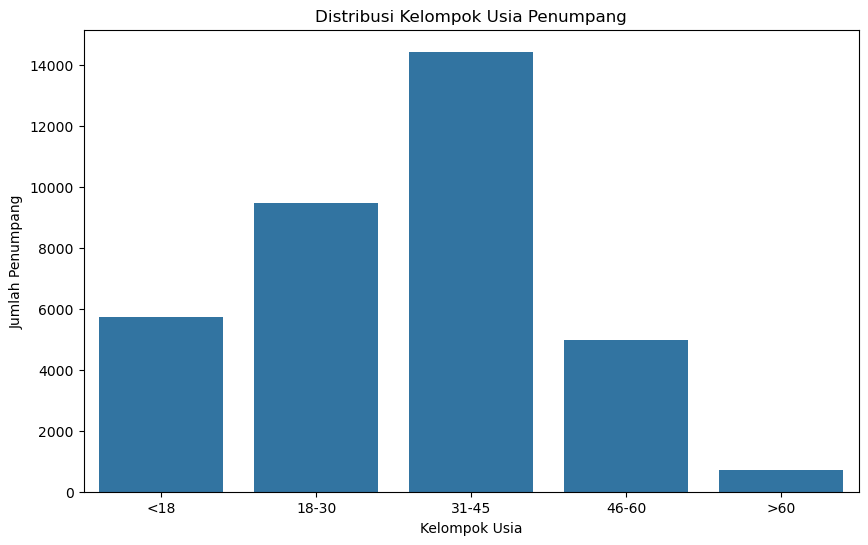

In [58]:
# Distribusi kelompok usia
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '>60'])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df)
plt.title('Distribusi Kelompok Usia Penumpang')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penumpang')
plt.show()

Dari data diatas kita bisa bahwa penumpang dengan **jenis kelamin wanita dan  pria cukup seimbang** dan **kelompok usia 18-45** mendominasi

# Kesimpulan dan Rekomendasi 


Dari hasil analisa, kita bisa membuat kesimpulan sebagai berikut:

- **Koridor Sibuk**: Koridor seperti Cibubur - Balai Kota memiliki transaksi terbanyak.
- **Jam Sibuk**: Puncak penggunaan terjadi pada 06:00–08:00 dan 17:00–19:00, menunjukkan pengguna utama adalah pekerja.
- **Durasi Perjalanan**: Rata-rata durasi perjalanan adalah ~50–90 menit, dengan beberapa outlier (misalnya, >2 jam).
- **Pembayaran**: Sebagian besar transaksi berbayar (3500 atau 20000), tetapi ada proporsi signifikan transaksi gratis (0).
- **Demografi**: Penumpang didominasi oleh usia produktif (18–45 tahun), dengan distribusi jenis kelamin yang seimbang.

### Rekomendasi:

- Tambah frekuensi bus pada koridor yang ramai dan jam sibuk.
- Promosikan tarif gratis untuk kelompok tertentu jika angka transaksi gratis tinggi, misalnya pelajar.
- Periksa transaksi tanpa tap-out untuk mendeteksi masalah sistem atau perilaku penumpang.
- Optimalkan rute dengan durasi panjang
- Tingkatkan validasi data untuk mengurangi missing values pada tapOutTime dan koordinat.

In [73]:
df.to_csv('Transjakarta_cleaned.csv', index=False)